# Charge et exploration de données

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# fix random seed for reproducibility
numpy.random.seed(7)

In [5]:
# download the data from web and saved to local directory
# put the data in a variable make the following code usable for any data sources
##data_dir = "C:\\Users\\jeang\\Documents\\BDEB\\A62\\ProSyn3\\data"
data_dir  = "C:\\Users\\Nisha Haulkhory\\projet de synthese\\fer2013.csv"

In [6]:
# Original data is hold by df
df = pd.read_csv(data_dir )
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
df.shape

(35887, 3)

In [8]:
split = list(set(df['Usage']))
print(split)

['Training', 'PublicTest', 'PrivateTest']


In [9]:
df_training = df[df['Usage']=='Training']
df_PublicTest = df[df['Usage']=='PublicTest']
df_PrivateTest = df[df['Usage']=='PrivateTest']

df_training.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [10]:
df.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [12]:
df['length'] = df.pixels.apply(lambda x: len(str(x).split(' ')))
df.head()

,emotion,pixels,Usage,length
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,2304
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,2304
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,2304
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,2304
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,2304


In [13]:
lab = df.emotion.value_counts()
lab = pd.DataFrame(lab)
lab.head()


,emotion
3,8989
6,6198
4,6077
2,5121
0,4953


# Nettoyage de données

In [14]:
no_data = sum(df.length.isna())
no_data

0

* Nous constatons que Les données n'ont pas de valeur manquante 
* La distribution des emotions montre qu'il y a plus de catégorie 3 et moins de catégorie 1

# Points particulier

In [15]:
lab.plot.bar(title="labels break Down")

* Les données contient essentiellement deux colonnes: emotion est la cible (catégories) et pixels l'image 48x48 = 2304

* L'autre colonne, Usage, est une parition des données: Training, PublicTest, PrivateTest
* Nous allons utiliser la partie Training pour developper le modele et PrivateTest pour tester notre modele
* En fin, la partie PublicTest sera utilisée pour la validation

Fear


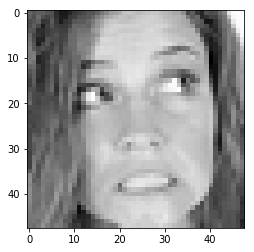

In [16]:
import numpy as np
import matplotlib.pyplot as plt
FER2013_WIDTH = 48
FER2013_HEIGHT = 48
Emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]  # indices 0 to 6
sample = []
def fer2013_show_instance(index):
    """Shows the image and the emotion label of the index's instance."""
    image = np.reshape(df_training.at[index, "pixels"].split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
    sample.append(image)
    #image -= np.mean(image)
    #image /= np.std(image)
    print(Emotions[df_training.at[index, "emotion"]])
    plt.imshow(image, cmap="gray")
fer2013_show_instance(np.random.randint(0,len(df_training)))

In [17]:
def fer2013_to_X():
    """Transforms the (blank separated) pixel strings in the DataFrame to an 3-dimensional array 
    (1st dim: instances, 2nd and 3rd dims represent 2D image)."""
    
    X = []
    pixels_list = df_training["pixels"].values
    
    for pixels in pixels_list:
        single_image = np.reshape(pixels.split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
        X.append(single_image)
        
    # Convert list to 4D array:
    X = np.expand_dims(np.array(X), -1)
    
    # Normalize image data:
   # X -= np.mean(X, axis=0)
    X = X/255
    
    return X

In [18]:
def fer2013_to_Y():
    """Transforms the (blank separated) pixel strings in the DataFrame to an 3-dimensional array 
    (1st dim: instances, 2nd and 3rd dims represent 2D image)."""
    
    X = []
    pixels_list = df_PrivateTest["pixels"].values
    
    for pixels in pixels_list:
        single_image = np.reshape(pixels.split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
        X.append(single_image)
        
    # Convert list to 4D array:
    X = np.expand_dims(np.array(X), -1)
    
    # Normalize image data:
   # X -= np.mean(X, axis=0)
    X = X/255
    
    return X

In [19]:
X=fer2013_to_X()
X_test = fer2013_to_Y()

In [20]:
X.shape
#X[0].shape
#X_test.shape
print(X.shape)
print(X_test.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)


In [21]:
 #Get labels (one-hot encoded)
Y = pd.get_dummies(df_training['emotion']).values
Y_test = pd.get_dummies(df_PrivateTest['emotion']).values
#Y.shape
print(Y_test.shape)



(3589, 7)


In [22]:
#print(np.max(X[0]))
#print(np.min(X[0]))
print(np.max(X_test[0]))
print(np.min(X_test[0]))

1.0
0.17647058823529413


# Let us reshape the images so that it's of size 48 x 48 x 1, and feed this as an input to the network.

The reason you need to reshape your data is that Tensorflow expects a certain input shape for its Deep Learning Model, i.e., in this case, a Convolution Neural Network, specifically:

(<number of images>, <image x_dim>, <image y_dim>, <number of channels>)

In [23]:
# Reshape training and testing image
X= X.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)
input_shape = X.shape
Y.shape


(28709, 7)

# The Deep Neural Network

First, we will define the Convolutional neural networks architecture as follows:

1- The first hidden layer is a convolutional layer called a Convolution2D. We will use 32 filters with size 5×5 each.

2- Then a Max pooling layer with a pool size of 2×2.

3- Another convolutional layer with 64 filters with size 5×5 each.

4- Then a Max pooling layer with a pool size of 2×2.

5- Then next is a Flatten layer that converts the 2D matrix data to a 1D vector before building the fully connected layers.

6- After that we will use a fully connected layer with 1024 neurons and relu activation function.

7- Then we will use a regularization layer called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.

8- Finally, the output layer which has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.


In [58]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D 
import tensorflow as tf

# Step 1 – Create a model:

Keras first creates a new instance of a model object and then add layers to it one after the another. It is called a sequential model API. We can add layers to the neural network just by calling model.add and passing in the type of layer we want to add. Finally, we will compile the model with two important information, loss function, and cost optimization algorithm.

In [59]:
# Creating a Sequential Model and adding the layers
input_shape = (48, 48, 1)
model = Sequential()
#first layer
model.add(Conv2D(32, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#second layer
model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(7,activation=tf.nn.softmax)) 

# Network Parameters

Next, you need to define the network parameters. Firstly, you define the number of inputs. This is 2304 since the image is initially loaded as a 2304-dimensional vector. Later, you will see that how you will reshape the 2304-dimensional vector to a 48 x 48 x 1 matrix. Secondly, you'll also define the number of classes, which is nothing else than the number of class labels.here 7

In [60]:
#Compile the model
optimizer = 'adam'
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) 

In [61]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 44, 44, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                331840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [62]:
l = model.fit(x=X,y=Y,validation_data = (X_test, Y_test), batch_size=50,epochs=10) 

Epoch 1/10
575/575 [==============================] - 78s 135ms/step - loss: 1.6840 - accuracy: 0.3278 - val_loss: 1.5455 - val_accuracy: 0.4076
Epoch 2/10
575/575 [==============================] - 88s 152ms/step - loss: 1.5077 - accuracy: 0.4151 - val_loss: 1.4439 - val_accuracy: 0.4425
Epoch 3/10
575/575 [==============================] - 79s 138ms/step - loss: 1.4200 - accuracy: 0.4506 - val_loss: 1.3749 - val_accuracy: 0.4684
Epoch 4/10
575/575 [==============================] - 78s 136ms/step - loss: 1.3529 - accuracy: 0.4785 - val_loss: 1.3470 - val_accuracy: 0.4862
Epoch 5/10
575/575 [==============================] - 78s 135ms/step - loss: 1.2924 - accuracy: 0.5042 - val_loss: 1.3282 - val_accuracy: 0.4893
Epoch 6/10
575/575 [==============================] - 80s 139ms/step - loss: 1.2231 - accuracy: 0.5304 - val_loss: 1.3275 - val_accuracy: 0.4868
Epoch 7/10
575/575 [==============================] - 78s 136ms/step - loss: 1.1658 - accuracy: 0.5545 - val_loss: 1.3176 - val_ac

# Evaluate Model

In [63]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test)
print("test loss, test acc:", results)

Evaluate on test data
113/113 [==============================] - 3s 23ms/step - loss: 1.4109 - accuracy: 0.5096
test loss, test acc: [1.4108641147613525, 0.5096126794815063]


In [64]:
l.history

{'loss': [1.6839851140975952,
  1.5077027082443237,
  1.4199751615524292,
  1.352886438369751,
  1.2924253940582275,
  1.223116159439087,
  1.1658347845077515,
  1.098428726196289,
  1.0208160877227783,
  0.9576470255851746],
 'accuracy': [0.32777178287506104,
  0.41509631276130676,
  0.4506252408027649,
  0.4784562289714813,
  0.5041972994804382,
  0.530426025390625,
  0.5545299649238586,
  0.5812811255455017,
  0.6077536940574646,
  0.6323104500770569],
 'val_loss': [1.5454697608947754,
  1.4439074993133545,
  1.374855875968933,
  1.3469959497451782,
  1.3282071352005005,
  1.3274608850479126,
  1.3175827264785767,
  1.3294501304626465,
  1.331013560295105,
  1.410863995552063],
 'val_accuracy': [0.407634437084198,
  0.44246307015419006,
  0.4683755934238434,
  0.48620784282684326,
  0.4892727732658386,
  0.4867651164531708,
  0.4937308430671692,
  0.5009751915931702,
  0.5029256343841553,
  0.5096126794815063]}

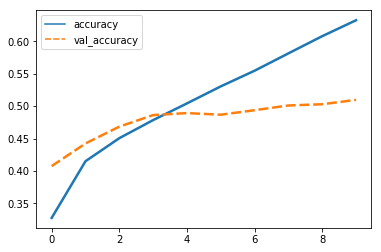

In [65]:
import seaborn as sns
df_history = pd.DataFrame(l.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

# Predict

In [66]:
# load test data and make prediction
y_pred= model.predict(X_test)

In [67]:
# convert prediction to df
submission = pd.DataFrame(data=y_pred)

# set label as the 0-6 class with highest value 
submission['Label'] = submission.idxmax(axis=1)
submission['ImageId'] = np.asarray([i+1 for i in range(submission.shape[0])])

In [68]:
submission.head()

,0,1,2,3,4,5,6,Label,ImageId
0,0.304383,0.079785,0.166992,0.067366,0.170076,0.038630,0.172768,0,1
1,0.446325,0.000201,0.045996,0.050455,0.342728,0.049022,0.065272,0,2
2,0.017531,0.000339,0.085442,0.248416,0.377500,0.210183,0.060589,4,3
3,0.098930,0.009394,0.093737,0.149744,0.446578,0.029463,0.172153,4,4
4,0.192206,0.080519,0.087873,0.004244,0.538732,0.001845,0.094581,4,5


In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(submission['Label'],df_PrivateTest['emotion'])

In [70]:
print(pd.DataFrame(cm))

     0   1    2    3    4    5    6
0  197  14   81   40   83   12   48
1    2  16    1    1    2    0    1
2   58   4  163   26   76   67   44
3   61   6   56  669   90   35   91
4   92   9  101   59  211   29  101
5   16   0   61   20   15  246   14
6   65   6   65   64  117   27  327


# Data Augmentation

In [71]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True,
                        vertical_flip=False)


In [72]:
L1 = model.fit_generator(datagen.flow(X,Y, batch_size=50),epochs = 20, 
                                  validation_data = (X_test,Y_test),verbose = 1, 
                                  steps_per_epoch = X.shape[0] / 100,)

Epoch 1/20
288/287 [==============================] - 41s 144ms/step - loss: 1.6366 - accuracy: 0.3598 - val_loss: 1.3839 - val_accuracy: 0.4533
Epoch 2/20
288/287 [==============================] - 42s 145ms/step - loss: 1.5626 - accuracy: 0.3874 - val_loss: 1.2955 - val_accuracy: 0.5096
Epoch 3/20
288/287 [==============================] - 43s 149ms/step - loss: 1.5470 - accuracy: 0.3973 - val_loss: 1.3312 - val_accuracy: 0.4982
Epoch 4/20
288/287 [==============================] - 43s 148ms/step - loss: 1.5294 - accuracy: 0.4045 - val_loss: 1.3047 - val_accuracy: 0.4873
Epoch 5/20
288/287 [==============================] - 44s 152ms/step - loss: 1.5029 - accuracy: 0.4160 - val_loss: 1.3030 - val_accuracy: 0.4907
Epoch 6/20
288/287 [==============================] - 45s 156ms/step - loss: 1.4795 - accuracy: 0.4339 - val_loss: 1.2895 - val_accuracy: 0.5013
Epoch 7/20
288/287 [==============================] - 44s 154ms/step - loss: 1.4963 - accuracy: 0.4232 - val_loss: 1.2868 - val_ac

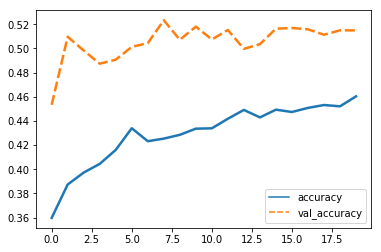

In [73]:
import seaborn as sns
df_history1 = pd.DataFrame(L1.history)
sns.lineplot(data=df_history1[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);


Angry


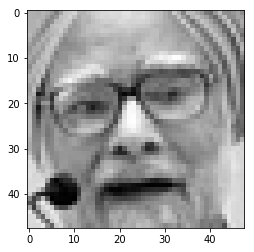

In [74]:
fer2013_show_instance(1)

In [75]:
# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
# convert to numpy array

Neutral


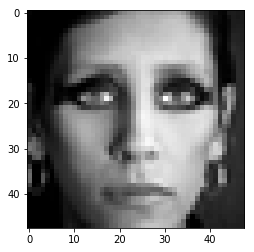

In [76]:
image_sample = np.reshape(df_training.at[4, "pixels"].split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
plt.imshow(image_sample, cmap="gray")
print(Emotions[df_training.at[4, "emotion"]])


In [77]:
image_sample= image_sample.reshape(-1, 48, 48, 1)
image_sample.shape


(1, 48, 48, 1)

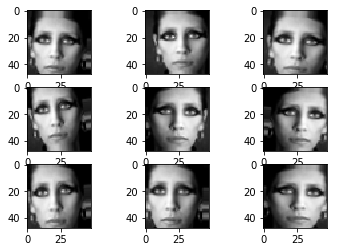

In [78]:
# create image data augmentation generator
datagen = ImageDataGenerator(featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True,
                        vertical_flip=False)
# prepare iterator
it = datagen.flow(image_sample, batch_size=1)
# generate samples and plot
image =[]
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8').reshape(48,48)
    plt.imshow(image,cmap="gray")
plt.show()

# Saving model

In [79]:
# serialize model to JSON
model_json = model.to_json()
with open('C:\\Users\\Nisha Haulkhory\\projet de synthese\\GIT\\ProSyn3\\fer.json', "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("C:\\Users\\Nisha Haulkhory\\projet de synthese\\GIT\\ProSyn3\\fer.h5")
print("Saved model to disk")

Saved model to disk
